### Wine data에 대하여 3개의 군집으로 군집화하고 
 - 오리지널 데이터를 차원 축소하여 그린 그림과 
 - 군집화한 데이터를 차원 축소하여 그린 그림을 비교하시오. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

### wine data 3개로 군집화 

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(wine.data, wine.target, columns=wine.feature_names)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

pca = PCA(n_components=3)
wine_pca = pca.fit_transform(wine_std)

In [6]:
df['pca_x'] = wine_pca[:, 0]
df['pca_y'] = wine_pca[:, 1]
df['pca_z'] = wine_pca[:, 2]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,pca_x,pca_y,pca_z
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,3.316751,-1.443463,-0.165739
0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2.209465,0.333393,-2.026457
0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2.516740,-1.031151,0.982819
0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,3.757066,-2.756372,-0.176192
0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.008908,-0.869831,2.026688


### K-Means 모델 생성/학습

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [9]:
kmeans.fit(wine_std)

KMeans(n_clusters=3, random_state=2021)

In [10]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [12]:
df['target'] = wine.target
df['cluster'] = kmeans.labels_
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,pca_x,pca_y,pca_z,target,cluster
2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,-3.370524,-2.216289,-0.342570,2,2
2,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,-2.601956,-1.757229,0.207581,2,2
2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,-2.677839,-2.760899,-0.940942,2,2
2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,-2.387017,-2.297347,-0.550696,2,2
2,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,-3.208758,-2.768920,1.013914,2,2


In [13]:
result = df.groupby(['target', 'cluster']).count()
result.head()

alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  \
target cluster                                                           
0      0             59          59   59                 59         59   
1      0              3           3    3                  3          3   
       1             65          65   65                 65         65   
       2              3           3    3                  3          3   
2      2             48          48   48                 48         48   

                total_phenols  flavanoids  nonflavanoid_phenols  \
target cluster                                                    
0      0                   59          59                    59   
1      0                    3           3                     3   
       1                   65          65                    65   
       2                    3           3                     3   
2      2                   48          48                    48   

                proanthocyanins  color_intensity  hue  \
target cluster                                          
0      0                     59               59   59   
1      0                      3                3    3   
       1                     65               65   65   
       2                      3                3    3   
2      2                     48               48   48   

                od280/od315_of_diluted_wines  proline  pca_x  pca_y  pca_z  
target cluster                                                              
0      0                                  59       59     59     59     59  
1      0                                   3        3      3      3      3  
       1                                  65       65     65     65     65  
       2                                   3        3      3      3      3  
2      2                                  48       48     48     48     48

### 시각화 

 - 군집화한 결과를 차원 축소하여 시각화

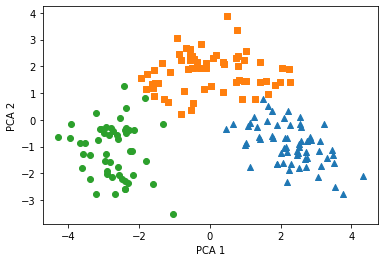

In [14]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_data = df[df['cluster']==i]['pca_x']
    y_data = df[df['cluster']==i]['pca_y']
    plt.scatter(x_data, y_data, marker=marker)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

 - 원 데이터를 차원 축소하여 시각화

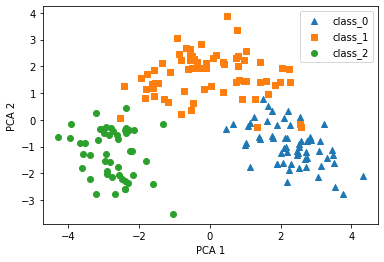

In [16]:
for i, marker in enumerate(markers):
    x_data = df[df['target']==i]['pca_x']
    y_data = df[df['target']==i]['pca_y']
    plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

 - 두 시각화 비교 

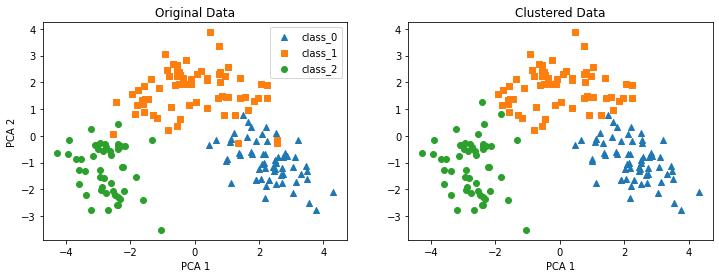

In [18]:
fig, asx = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
columns = ['target', 'cluster']

for k, column in enumerate(columns):
    ax = asx[k]
    for i, marker in enumerate(markers):
        x_data = df[df[column]==i]['pca_x']
        y_data = df[df[column]==i]['pca_y']
        ax.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])

    ax.set_xlabel('PCA 1')
    if k == 0:
        ax.set_title('Original Data')
        ax.set_ylabel('PCA 2')
        ax.legend()
    else:
        ax.set_title('Clustered Data')